# FIT9136 Algorithms and programming foundations in Python 

# Week 6 Lab Activities: Concepts of Decomposition and Abstract Data Types II

<small>\#AbstractDataTypes \#Queue \#Stack</small>

## 1. Stack
<small>\#LastInFirstOut</small>

*When it comes to stack, what immediately comes to my mind is a stack of pancakes. Well, who doesn't?*

![](https://miro.medium.com/max/200/1*8bY4deuFLgE5NXOuIFVUNA.gif "pancake stack gif from Medium")

**How is the pancake stack built?**
- Layer by layer from the bottom to the top

**How do we eat the pancake stack?**
- ❌ Eat the whole stack with hands like it's a hamburger (You get to respect, though)
- ✔️ Get the pancake from the top of it

<b>When it comes to python, the Stack implementation works in the same way.</b>

1. Stack is an **ordered** collection where data items are accessed based on **LIFO** (Last-In-First-Out).

2. **We add new items and remove items at the "top" of the stack**

3. Stack is useful for reversing the order of items within a collection

In [14]:
# Stack Implementation
class Stack:
    # create a constructor to initialize the stack & count variable
    def __init__(self):
        self.the_stack = []
        self.count = 0
    
    # overload len method to get the size/count of the stack
    def __len__(self):
        return self.count

    # is_empty method checks if stack is empty or not
    def is_empty(self):
        return self.count == 0
    
    # push method push the item into stack
    def push(self,item):
        self.the_stack.append(item)
        self.count += 1

    # pop method pops out the item from top of the stack
    def pop(self):
        assert not self.is_empty()
        self.count -= 1
        return self.the_stack.pop()
    # peek method helps us to look inside the values of stack
    def peek(self):
        assert not self.is_empty()
        return self.the_stack[-1]
    # string representation of the stack
    def __str__(self):
        return f'Stack({str(self.the_stack)})'

In [15]:
q = Stack()
len(q)

0

## 2. Queue
<small>\#FirstComeFirstServed</small>

*No one(Nothing) can skip the queue in Python!*

![](https://images.squarespace-cdn.com/content/v1/53152ab5e4b0a2b0a37f746a/1580780432046-MT7NWDPNI0JPD16MRRZA/darumaotoshi-222222-shorter.gif?format=200w "Daruma Otoshi gif from Dylan Banks")

In reality, we line up to take the bus, to buy a nice cup of bubble tea, or to get into the vaccination booking website.

In python, we can also implement the Queue for objects to line up and wait to be served on the first come first served basis.

### What is Queue?
* An ordered collection where data items are accessed based on <font color=blue>FIFO (First-In-First-Out)</font>
* **Adding new items at the “rear” of the queue (i.e. enqueue/append)**
* **Removing existing items at the “head” of the queue (i.e. dequeue/serve)**
* Useful for demonstrating a queuing system (strictly no jumping the queue)

In [5]:
# Queue Implementation

class Queue:
    # create constructor to define the queue and count variable
    def __init__(self):
        self.the_queue = []
        self.count = 0
        
    # Overload len method so that we can count/size of the queue
    def __len__(self):
        return self.count
    
    # is_empty methods check if queue is empty or not
    def is_empty(self):
        return self.count == 0
    
    # append method added item to the queue
    def append(self,item):
        self.the_queue.append(item)
        self.count += 1

    # serve method remove the item from the queue
    def serve(self):
        assert not self.is_empty()
        self.count -= 1
        return self.the_queue.pop(0)

    # peek function let us peek/look inside a queue
    def peek(self):
        assert not self.is_empty()
        return self.the_queue[-1]

In [13]:
q = Queue()
q.__len__()

0

## 3. Discussion

### 3.1 What are the key differences between List, Stack, & Queue ?

- List: Random Access
- Stack: Last In First Out
- Queue: First In Last Out

### 3.2 Can we use dictionary to implement Stack and Queue?

Yes. 

**How?**
- The key of the dictionary can serve as the index of the list in the original implementation, that can maintain the order of the item. 

**Why?**
- Using dictionary to implement Queue will be more time efficient than list. When we serve the front item in Queue, the first item of the list is deleted. The whole list will be iterated to update the index of all items behind. 

- However, with the on going queuing and serving operations, the key values will go infinitely high eventually unless there is a mechanism to reuse the smaller key values that the item has been served and removed from the dictionary.


---


**[Out of syllabus]** Another time efficient way to implement Queue would be *linked list*.

## 4  Implement Stack using 2 queues

Run the code cell at the top of this notebook to create the Queue class in the runtime. Please implement Stack ADT from scratch using 2 Queue instead of a list. The Stack implemented should have the same functionality as the Stack defined at the start of this notebook.

In [3]:
# Your implementation
class Stack(Queue):
    

In [33]:
class Stack: 
    def __init__(self): 
        # Two inbuilt queues  
        self.q1 = Queue() 
        self.q2 = Queue()  
        # To maintain current number  
        # of elements 
        self.curr_size = 0


        
    def push(self, x):
        self.curr_size += 1
        # Push x first in empty q2  
        self.q2.append(x)
        # Push all the remaining  
        # elements in q1 to q2.  
        while (not self.q1.is_empty()): 
            self.q2.append(self.q1.the_queue[0])  
            self.q1.serve()
        # swap the names of two queues  
        self.q = self.q1  
        self.q1 = self.q2  
        self.q2 = self.q
        
    def pop(self):
        # if no elements are there in q1  
        if (self.q1.is_empty()):  
            return
        self.q1.serve()  
        self.curr_size -= 1
    
    def top(self): 
        if (self.q1.is_empty()): 
            return -1
        return self.q1.the_queue[0]
    
    def size(self): 
        return self.curr_size 
    
    def __len__(self):
        return self.curr_size

In [35]:
# test
s = Stack() 
s.push(1)  
s.push(2)  
s.push(3)
print("current size: ", s.size()) 
print(len(s))
print(s.top())  
s.pop()  
print(s.pop())  
s.pop()  
print(s.top())
print("current size: ", s.size())
len(s)

current size:  3
3
3
None
-1
current size:  0


0

## 5. List Reversal

Write a function that takes a list as the argument, and reverse the input list by using a Stack.

In [48]:
# Your implementation
def my_reverse(li):
    s = Stack()
    
    for i in li[::-1]:
        s.push(i)
    result = s
    return result
        

In [52]:
#Testing the function
li = [1,2,3,4]
print(li)

my_reverse(li)


[1, 2, 3, 4]


## 6. Mid-Sem Test Prep

- Feel free to ask any questions
- If no questions, we have prepared some questions for you.

## 7. Exercise: Maze Solver

In this task, we will implement a maze solver with the help of Stack. 

*First thing first, we have to create a maze.*

### 7.1 Importing Maze class

Luckily, we have already created a `maze.py` file which contains the `Maze` class. 

Let us import the Maze class here. 

From the code below, we are importing the Maze class from the maze.py file that is <u>stored in the same directory of this notebook</u>.

In [ ]:
from maze import Maze # importing Maze class from maze.py file

In [ ]:
# Let's have a look at the docString of Maze
?Maze

From the docString of the constructor(\_\_init\_\_) method, we know we have to parse a **list of two integers** for the `dimension` argument that defines the dimension of the Maze instance created.

After creating the Maze instance, we can use the following methods:
1. print_maze()
2. get_maze()
3. get_grid(row_idx, col_idx)
4. get_dimension()

Now, let's have a look at the bottom of the `maze.py` file.

In [ ]:
# prints the last 10 lines of maze.py file
with open('maze.py') as f:
    print(''.join(f.readlines()[-10:]))

        Returns:
            tuple(int,int): dimension of the maze(number of rows, number of columns)
        """
        return self.dimension

if __name__ == "__main__":
    # The code below will be performed only if the script is run directly
    # It will not run when the script is imported
    a_maze = Maze([12,12])
    print("Maze created.")



<font color='red'><b>Question:</b></font> When we import the file in the code cell above, why doesn't it print "Maze created"? The line `print("Maze created.")` is clearly in the script!

<font color='red'><b>Answer:</b></font> **?**

However, when we run the maze.py script directly, the \_\_name\_\_ attribute of the script will become "\_\_main\_\_". The statements under the if-block will run.

In [ ]:
# executing maze.py file directly
# If this cell takes forever to run, simply stop running this cell and run again
!python maze.py

Maze created.


### 7.2 Creating a Maze instance

In [ ]:
# If this cell takes forever to run, simply stop running this cell and run again
maze = Maze([12,16])
maze.print_maze()

start
 ↓
┌ ──────────────────────────────┐
│                X              │
│  X   X   X   X   X   X X   X  │
│X       X X   X         X   X  │
│X X   X       X   X X     X    │
│X X X     X   X       X X X X  │
│X X X X   X     X X       X    │
│X X X X   X   X X X   X   X X  │
│X X   X X       X       X X X  │
│X X       X   X   X   X X      │
│X   X   X X   X           X X  │
│X               X X   X   X    │
│    X   X   X         X     X  │
└────────────────────────────── ┘
                               ↓
                              End


Now, we have created `maze` as a `Maze` instance. Each grid of maze can be accessed by the `get_grid()` method, just like the example below:

In [ ]:
# getting the value of the the grid at 0th row and 1st column
# the value can be ' '(not occupied) or 'X'(occupied)
print(repr(maze.get_grid(0,1)))

'X'


### 7.3 The MazeSolver class

Now, we have been given a maze. We have to create a MazeSolver Class that solves the maze. 

At each step, we can only go one step forward, backward, leftward or rightward, and they can be represented as follows:

step | representation
-|-
forward|`(1,0)`
backward|`(-1,0)`
leftward|`(0,-1)`
rightward|`(0,1)`

Every grid can only be visited once and the grids indicated by 'X' are not accessible.

You only need to complete the `solve_path()` method in this class. This method returns a list of steps that can reach the ending point of the maze from the starting point.

For example, consider the following maze:

<pre>
start
 ↓
┌ ────┐
│     │
│X X  │
│X X  │
└──── ┘
     ↓
    End
</pre>

The solve_path method will return [(0,1),(0,1),(1,0),(1,0)]

**The Logic Illustrated**

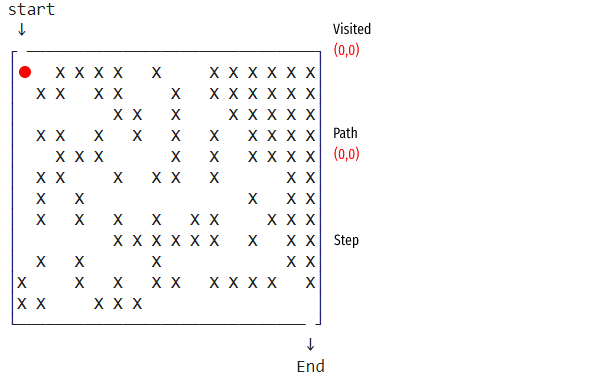

From the gif above, we have a list `visited` that stores all the coordinates that we have visited before.

`Path` is a Stack that stores all the **coordinates** that we have visited from starting point `(0,0)` to the current point `(x,y)`.

`Step` is another Stack that relates to `Path`, where we will record the **steps** taken from starting point `(0,0)` to the current point `(x,y)`.

**The Algorithm**

Step 1:
* Initialise: Append (0,0) to `visited` list and `path` Stack. The **top** of the `path` Stack represents our *current coordinates*.


---


Step 2:
* If the *current coordinates* are the coordinates of ending point, return the list inside the `step` Stack.
* If the *current coordinates* are NOT the coordinates of ending point, search for available adjacent coordinates that are not visited for the *current coordinate*. (up, down, left, right)


---


Step 3:
* If there there are NO adjacent coordinates found from step 2, we go back one step. Pop step Stack and path Stack.
* If there there are adjacent coordinates found from step 2, go to the first available adjacent coordinates. Push the first available adjacent coordinates to the `path` Stack and the corresponding step record to the `step` Stack.


---


Step 4:
* Go to step 2


In [ ]:
class MazeSolver:
    def __init__(self, maze):
        self.maze = maze
    def _get_available_steps(self,coordinates,visited):
        """
        Check if there are still valid step(s) for the current coordinates and return a list of valid steps
        Args:
            1. coordinates(tuple(int,int)): The COORDINATES of the current step (row,col)
            2. visited(list(tuple(int,int))): A list of tuples of COORDINATES of visited grids
        Returns:
            1. list(tuple(int,int)): List of available and valid STEPS
        """
        available_steps = []
        if self._is_valid_step((coordinates[0] - 1, coordinates[1]),visited): # up
            available_steps.append((-1, 0 ))
        if self._is_valid_step((coordinates[0] + 1, coordinates[1]),visited): # down
            available_steps.append((1, 0))
        if self._is_valid_step((coordinates[0], coordinates[1] - 1),visited): # left
            available_steps.append((0, -1))
        if self._is_valid_step((coordinates[0], coordinates[1] + 1),visited): # right
            available_steps.append((0, 1))
        return available_steps

    def _is_valid_step(self,coordinates,visited):
        """
        Check if the coordinates of the step is valid
        Args:
            1. coordinates(tuple(int,int)): The COORDINATES to be verified (row,col)
            2. visited(list(tuple(int,int))): A list of tuples of COORDINATES of visited grids
        Returns:
            1.bool: A boolean value indicating if the coordinate is accessible/valid 
        """
        return (coordinates[0] >= 0 and # row_idx >= 0
                coordinates[1] >= 0 and # col_idx >= 0
                coordinates not in visited and # coordinates not visited before
                coordinates[0] <= self.maze.get_dimension()[0] - 1 and # row_idx < number of rows
                coordinates[1] <= self.maze.get_dimension()[1] - 1 and # col_idx < number of cols
                self.maze.get_grid(coordinates[0], coordinates[1]) != 'X') # the coordinates not occupied
    def solve_path(self):
        """
        Solve the steps to reach the ending point from starting point of the maze
        Returns:
            1. list(tuple(int,int)): A list of steps taken
        """
        # Your implementation
        
    def animate(self):
        """
        Just a method that animates the solved path from start to end
        """
        from IPython.display import clear_output
        from time import sleep
        steps = self.solve_path()
        current_step = (0,0)
        self.maze.the_maze[0][0] = '\x1b[1;31m●\033[0m'
        self.maze.print_maze()
        for step in steps:
            sleep(0.3)
            clear_output(wait=True)
            current_step = (current_step[0] + step[0], current_step[1] + step[1])
            self.maze.the_maze[current_step[0]][current_step[1]] = '\x1b[1;31m●\033[0m'
            self.maze.print_maze()
        current_step = (0,0)
        for step in steps:
            current_step = (current_step[0] + step[0], current_step[1] + step[1])
            self.maze.the_maze[current_step[0]][current_step[1]] = ' '


In [ ]:
# Create MazeSolver instance
amaze_solver = MazeSolver(maze)
# print the steps obtained from solve_path
print(amaze_solver.solve_path())

In [ ]:
# animate the steps of solving the maze
amaze_solver.animate()